In [49]:
import numpy as np
import pandas as pd
import statsmodels.tsa.seasonal as STL
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

testData_01 = pd.read_csv("./TestdatenSet1.csv")
print(testData_01)

# Do one with electrity and one with voltage



       Id              Zeitstempel MaschinenID  ...  Strom  WirkLeistung   Arbeit
0      96  2025-08-04 10:49:15.287  HELLER_PT5  ...    NaN           NaN      NaN
1      97  2025-08-04 11:22:01.020  HELLER_PT5  ...    NaN           NaN      NaN
2      98  2025-08-04 11:24:27.807  HELLER_PT5  ...    NaN           NaN      NaN
3      99  2025-08-04 11:26:07.867  HELLER_PT5  ...    NaN           NaN      NaN
4     100  2025-08-04 11:30:28.233  HELLER_PT5  ...    NaN           NaN      NaN
..    ...                      ...         ...  ...    ...           ...      ...
995  1091  2025-08-21 12:19:32.197  HELLER_PT5  ...    NaN           NaN      NaN
996  1092  2025-08-21 12:19:39.117  HELLER_PT5  ...    NaN           NaN      NaN
997  1093  2025-08-21 12:19:44.327  HELLER_PT5  ...    NaN           NaN      NaN
998  1094  2025-08-21 12:19:49.933  HELLER_PT5  ...    NaN           NaN      NaN
999  1095  2025-08-21 12:23:37.007  HELLER_PT5  ...  2,205        260,75  51780.0

[1000 rows x 50

                          Power
Timestamp                      
2025-08-13 13:14:31.907  1.9775
2025-08-13 13:14:39.533  1.7675
2025-08-13 13:14:45.640  1.8025
2025-08-13 13:14:51.660  1.8025
2025-08-13 13:14:57.687  1.8025
...                         ...
2025-08-13 13:43:01.807  1.6800
2025-08-13 13:43:10.727  1.6975
2025-08-13 13:43:16.730  1.7150
2025-08-13 13:43:22.850  1.7150
2025-08-21 12:23:37.007  2.2050

[365 rows x 1 columns]
            Power
Timestamp        
0.000      1.9775
7.626      1.7675
13.733     1.8025
19.753     1.8025
25.780     1.8025
...           ...
1703.870   1.6975
1709.900   1.6800
1718.820   1.6975
1724.823   1.7150
1730.943   1.7150

[364 rows x 1 columns]


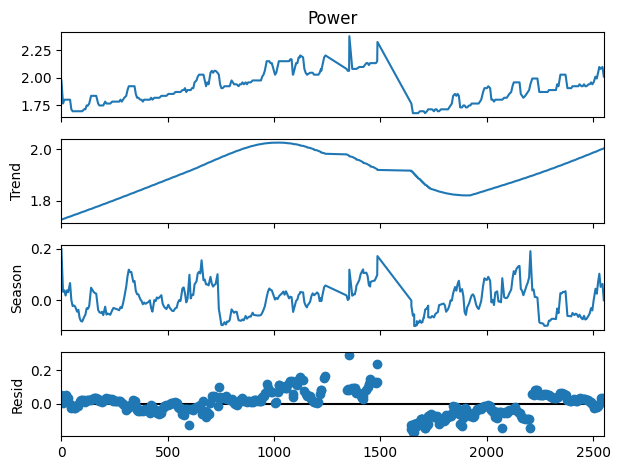

In [ ]:
# Strom pipeline
testData_01_power_df = testData_01[["Zeitstempel", "Strom"]].copy()
# We will assume for now that NaN is equivalent to the machine just not running; optional: we could try to build a missing value handler 
# based on linear interpolation (does that even make sense with electricity?) or maybe by estimating a value via loess regression
# set up dataframe with timestamp as an index 
testData_01_power_df.rename(columns= {"Zeitstempel": "Timestamp", "Strom": "Power"}, inplace = True)
testData_01_power_df["Power"] = testData_01_power_df["Power"].str.replace(",", ".", regex=False)
testData_01_power_df["Power"] = pd.to_numeric(testData_01_power_df["Power"], errors = "raise") # if errors then its put into an NaN state
testData_01_power_df.dropna(subset=["Power"], inplace = True)
# print(testData_01_power_df)

# setting up index and interpolate to get missing values 
testData_01_power_df["Timestamp"] = pd.to_datetime(testData_01_power_df["Timestamp"])
testData_01_power_df.set_index("Timestamp", inplace=True)
print(testData_01_power_df)

# most_common_time_inseconds = testData_01_power_df.index.to_series().diff().value_counts().head().index[0].total_seconds()
# testData_01_power_df = testData_01_power_df.resample(pd.Timedelta(seconds=most_common_time_inseconds)).mean()
# testData_01_power_df = testData_01_power_df.interpolate(method="time")
# print(testData_01_power_df)
testData_01_power_df.index = (testData_01_power_df.index  - testData_01_power_df.index[0]).total_seconds()
testData_01_power_df.drop(testData_01_power_df.index[-1], inplace=True)
print(testData_01_power_df)



In [ ]:
#transformation



In [ ]:
# first step stl
testData_01_power_df = testData_01_power_df.sort_index() #does that even make sense? It did although I assumed data was ordered in the csv file
stl_testData_power = STL.STL(testData_01_power_df["Power"], period=100)
res = stl_testData_power.fit()

res.plot()
plt.show()